In [18]:
import pandas as pd

from util import load_column_transformers, preprocess_data
from alphagan_class import AlphaGAN

import matplotlib.pyplot as plt

import keras.backend as K
import tensorflow as tf
import numpy as np

In [27]:
ag = AlphaGAN()
ag.load_pretrained_models('./snapshots/3900_')

test_normal_df = pd.read_csv('./data/test_set_normal.csv')
preprocess_data(test_normal_df, './data/ranges.csv')

test_abnomal_df = pd.read_csv('./data/test_set_abnomal.csv')
preprocess_data(test_abnomal_df, './data/ranges.csv')

Model: "Discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               15360     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)               

In [28]:
X_1 = test_normal_df.to_numpy()
X_2 = test_abnomal_df.to_numpy()

Z_hat_1 = ag.encoder.predict(X_1)
X_hat_1 = ag.generator.predict(Z_hat_1)

Z_hat_2 = ag.encoder.predict(X_2)
X_hat_2 = ag.generator.predict(Z_hat_2)

rec_losses_normal = np.linalg.norm(np.subtract(X_1, X_hat_1), axis=1)
rec_losses_fraud = np.linalg.norm(np.subtract(X_2, X_hat_2), axis=1)

In [36]:
thresholds = [t for t in np.arange(7.0,12.0,0.01)]

In [37]:
test_num = len(rec_losses_normal) + len(rec_losses_fraud)

In [38]:
normal_accuracies = []
for T in thresholds:
    rec_losses_correct = [loss for loss in rec_losses_normal if loss < T]
    normal_accuracies.append(len(rec_losses_correct) / len(rec_losses_normal))

fraud_accuracies = []
for T in thresholds:
    rec_losses_correct = [loss for loss in rec_losses_fraud if loss > T]
    fraud_accuracies.append(len(rec_losses_correct) / len(rec_losses_fraud))

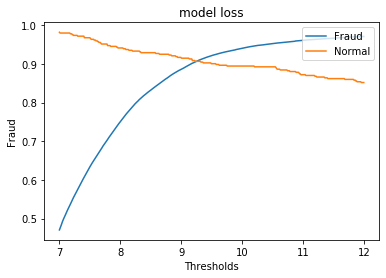

In [39]:
plt.plot(thresholds, normal_accuracies)
plt.plot(thresholds, fraud_accuracies)
plt.title('model loss')
plt.ylabel('Fraud')
plt.xlabel('Thresholds')
plt.legend(['Fraud', 'Normal'], loc='upper right');